![Title Image](https://user-images.githubusercontent.com/147800579/276565795-5cc5a12e-0043-4773-b67c-65ed34cbbbbe.PNG)
    
## Recommendations for Movie Production for Microsoft

Author: Shimnaz Fathima

Welcome to the Project Analysis done by Shimnaz Fathima! 
You will find a brief overview of the project, the findings and the recommendations derived after the completion of this project here. 

## Project Overview
This project involves using various avaiable movie related databases to perform data analysis and derive meaningful insights and recommendations for Microsoft for their new venture to create a new movie studio.

## Business Problem
Microsoft as a new entrant in the movie production space, requires expert recommendation in this area. This project looks into catering to this problem and doing analysis of the different movie related attributes and develop findings related to these. These findings will be converted into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## The Data
In the folder zippedData are movie datasets from:

+ Box Office Mojo
+ IMDB
+ Rotten Tomatoes
+ TheMovieDB
+ The Numbers

This project will be looking into the following datasets from the above listed ones:

+ imdb.title.basics
+ imdb.title.ratings
+ imdb.title.principals
+ mdb.name.basics
+ bom.movie_gross

I have used them to find the insights of recommended runtimes, best studios and recommended actors to be associated with.

The code starts here:

#### Importing useful modules

In [481]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Reading data

In [506]:
df1=pd.read_csv('zippedData/bom.movie_gross.csv.gz') 
df2=pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
df3=pd.read_csv('zippedData/imdb.title.basics.csv.gz')
df6=pd.read_csv('zippedData/imdb.title.principals.csv.gz')
df7=pd.read_csv('zippedData/imdb.name.basics.csv.gz')
df8=pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

#### Checking for Duplicates

In [507]:
df1.duplicated().value_counts()

False    3387
Name: count, dtype: int64

In [508]:
df2.duplicated().value_counts()

False    73856
Name: count, dtype: int64

In [509]:
df3.duplicated().value_counts()

False    146144
Name: count, dtype: int64

In [510]:
df6.duplicated().value_counts()

False    1028186
Name: count, dtype: int64

In [511]:
df7.duplicated().value_counts()

False    606648
Name: count, dtype: int64

In [512]:
df8.duplicated().value_counts()

False    5782
Name: count, dtype: int64

Therefore it can be confirmed that there are no duplicated data in the imported data as all the output shows no "True" values for the duplicate checker function.

#### Understanding the imported data

In [513]:
# Checking the top rows of df1
df1.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [514]:
#Checking df1 info
df1.info()

# We will need to convert foreign gross from object to float data type to perform munerical operations. 
# This will be done in data preperation section

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [515]:
# Checking the top rows of df2
df2.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [516]:
#Checking df2 info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [517]:
#Checking the top rows of df3
df3.head()

#In order to merge using movie title, we will need to change the name of columns with the title to a common name.
#We will change the name of column in df1 from "title" to "primary_title". This will be done in data cleaning section.

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [518]:
#Checking df3 info
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [519]:
#Checking the top rows of df6
df6.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [520]:
#Checking df6 info
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [521]:
#Checking the top rows of df7
df7.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [522]:
#Checking df7 info
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [524]:
#Checking the top rows of df8
df8.head()

#We will use the worldwide gross data from df8

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [525]:
# Checking df8 info
df8.info()

# We will need to convert worldwide gross data type from object to float.
# Before that the "$" needs to be removed. 
# Also the column name should be converted from "movie" to "primary_title".
# These will be done in the data cleaning section.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


#### Data Cleaning

In [526]:
# Removing unwanted columns
df1=df1.drop(['year'],axis=1)
df3=df3.drop(['original_title','start_year','genres'], axis=1)
df6=df6.drop(['ordering','job','characters'],axis=1)
df7=df7.drop(['birth_year','death_year','primary_profession','known_for_titles'],axis=1)
df8=df8.drop(['id','release_date','production_budget','domestic_gross'],axis=1)

In [527]:
# Dropping null values from the imported data
df1.dropna(inplace=True)
df2.dropna(inplace=True)
df3.dropna(inplace=True)
df6.dropna(inplace=True)
df7.dropna(inplace=True)
df8.dropna(inplace=True)

In [528]:
# Renaming movie title column in df1 and df8 from title/movie to primary_title
df1.rename(columns={'title': 'primary_title'}, inplace=True)
df8.rename(columns={'movie': 'primary_title'}, inplace=True)

In [529]:
# Removing "$" sign from the "worldwide gross" column

df8['worldwide_gross'] = df8['worldwide_gross'].str.replace('\D', '', regex=True)

In [530]:
# Converting the data type from object to float to perform artihmetic operations

df1['foreign_gross'] = pd.to_numeric(df1['foreign_gross'], errors='coerce')
df8['worldwide_gross'] = pd.to_numeric(df8['worldwide_gross'], errors='coerce')

In [531]:
# Verifying if the data cleaning is correctly done or not
df1.info()

# It can be noted that the data type of foreign_gross has changed from object to float
# Also the movie title column has been renamed to "primary_title"

<class 'pandas.core.frame.DataFrame'>
Index: 2007 entries, 0 to 3353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   primary_title   2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2002 non-null   float64
dtypes: float64(2), object(2)
memory usage: 78.4+ KB


In [532]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [533]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114405 entries, 0 to 146142
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           114405 non-null  object 
 1   primary_title    114405 non-null  object 
 2   runtime_minutes  114405 non-null  float64
dtypes: float64(1), object(2)
memory usage: 3.5+ MB


In [534]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   tconst    1028186 non-null  object
 1   nconst    1028186 non-null  object
 2   category  1028186 non-null  object
dtypes: object(3)
memory usage: 23.5+ MB


In [535]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   nconst        606648 non-null  object
 1   primary_name  606648 non-null  object
dtypes: object(2)
memory usage: 9.3+ MB


In [536]:
df8.info()

# It can be noted that the data type of worldwide_gross has changed from object to float
# Also the movie title column has been renamed to "primary_title"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   primary_title    5782 non-null   object
 1   worldwide_gross  5782 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.5+ KB


#### Data Analysis

Starting with the analysis on movie runtime and number of votes.

In [537]:
# Combining the dataframes containing num votes and runtimes.

df4=pd.merge(df2,df3)
df4.head()

,tconst,averagerating,numvotes,primary_title,runtime_minutes
0,tt10356526,8.3,31,Laiye Je Yaarian,117.0
1,tt10384606,8.9,559,Borderless,87.0
2,tt1042974,6.4,20,Just Inès,90.0
3,tt1043726,4.2,50352,The Legend of Hercules,99.0
4,tt1060240,6.5,21,Até Onde?,73.0


In [538]:
# For this analysis we further remove some unwanted columns.
# Creating a dataframe called rv_analysis for the analysis of runtime and votes
rv_analysis=df4.drop(['tconst','averagerating','primary_title'], axis=1)

# Grouping by runtime of the movies and finding the average votes for the movies with the same runtimes
rv_check =rv_analysis.groupby('runtime_minutes',as_index=False)['numvotes'].mean().sort_values(by='runtime_minutes',ignore_index=True)
rv_check

,runtime_minutes,numvotes
0,3.0,7.666667
1,4.0,5.500000
2,5.0,8.600000
3,6.0,6.666667
4,7.0,7.000000
...,...,...
284,808.0,100.000000
285,1100.0,5.000000
286,1440.0,219.000000
287,14400.0,69.000000


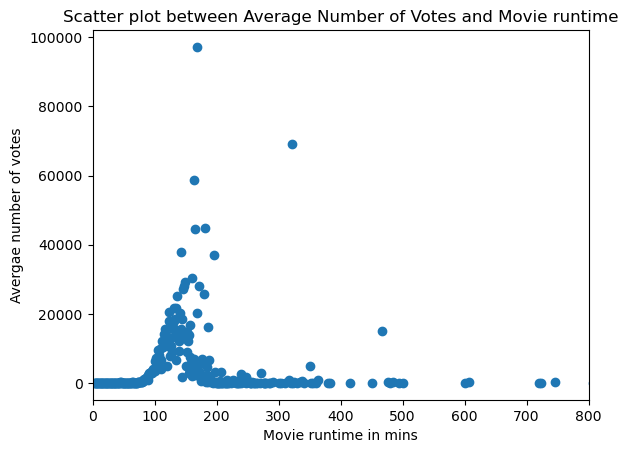

In [539]:
# Lets see if there exists any correlation between the runtime and votes
x1=rv_check.loc[:,'runtime_minutes']
y1=rv_check.loc[:,'numvotes']
#colors = ['red' if 130 <= value <= 190 else 'blue' for value in x]
plt.scatter(x1, y1)
plt.xlim(0, 800)
plt.title("Scatter plot between Average Number of Votes and Movie runtime")
plt.xlabel("Movie runtime in mins")
plt.ylabel("Avergae number of votes")
plt.show()

In [ ]:
# It can be observed that the plot above resembles a normal distribution. 
# If outliers in data can be removed, we may be able to derive meaningful insights from this distribution.

In [540]:
rv_analysis.sort_values(by='runtime_minutes',ignore_index=True,inplace=True)

#Trying to create bins of 10 mins interval and to distribute all the movie runtime into these bins

last=rv_analysis["runtime_minutes"].iloc[-1] #to get the highest runtime in the dataset
a=np.arange(0,(((last/10)+1)*10),10) #Creating bins starting from 0 to the last value of teh bin
b=a[1:-1] #array with runtime starting from 10 to the last value of the bin

# creating a new column "bin" and distributing the runtime into these bins.
# So all movie with runtime between 0 to 10 mins will have the value 10 in the corresponding "bins" column 
rv_analysis["bins"]=pd.cut(rv_analysis["runtime_minutes"],a,labels=np.arange(10,(((last/10)+1)*10),10))

# grouping by bins and finding the mean no of votes for the movies in each bin. This data is added in a new dataframe "rv"
rv=rv_analysis.groupby('bins',as_index=False)['numvotes'].mean().sort_values(by='bins',ignore_index=True)
rv["numvotes"]=rv["numvotes"].fillna(0) # if there are bins with no entries, the mean no of votes will be NaN, This will change it to 0

# in order to calculate the percentiles, introducing a new column, "cumilative".
# In this column, the cumilative sum of mean no of votes in each bin will be kept added onto
rv["cumilative"]=rv["numvotes"] #just to initialise the column with some values
rv

,bins,numvotes,cumilative
0,10.0,11.375000,11.375000
1,20.0,17.135135,17.135135
2,30.0,18.557522,18.557522
3,40.0,52.086957,52.086957
4,50.0,75.593724,75.593724
...,...,...,...
5137,51380.0,0.000000,0.000000
5138,51390.0,0.000000,0.000000
5139,51400.0,0.000000,0.000000
5140,51410.0,0.000000,0.000000


In [541]:
# calculating the cumilative value of the mean votes

for i in rv.index:
    if i==0:
        rv.at[i,"cumilative"]=rv.loc[i,"numvotes"]
    else:
        rv.at[i,"cumilative"]=rv.loc[i-1,"cumilative"]+rv.loc[i,"numvotes"]
        
rv

,bins,numvotes,cumilative
0,10.0,11.375000,11.375000
1,20.0,17.135135,28.510135
2,30.0,18.557522,47.067657
3,40.0,52.086957,99.154614
4,50.0,75.593724,174.748338
...,...,...,...
5137,51380.0,0.000000,168848.494351
5138,51390.0,0.000000,168848.494351
5139,51400.0,0.000000,168848.494351
5140,51410.0,0.000000,168848.494351


In [542]:
# finding the 25th, 50th and the 75th percentile of the number of votes

sum=rv["cumilative"].iloc[-1]
P25=0.25*sum #This value will be the 25th percentile
P50=0.5*sum #This value will be the 50th percentile
P75=0.75*sum #This value will be the 75th percentile

# Initialising the below variables to 0 and finding the index where the percentile values occur
iP25=0 
iP50=0
iP75=0

#finding the index values where the percentile values occur

for i in rv.index:
    if i==0:
        continue
    elif rv.at[i-1,"cumilative"]<=P25 and rv.at[i,"cumilative"]>P25:
        iP25=i-1
    if i==0:
        continue
    elif rv.at[i-1,"cumilative"]<=P50 and rv.at[i,"cumilative"]>P50:
        iP50=i-1 
    if i==0:
        continue
    elif rv.at[i-1,"cumilative"]<=P75 and rv.at[i,"cumilative"]>P75:
        iP75=i-1  

In [543]:
# This is the movie runtime corresponding to the 25th percentile of the votes
rv.loc[iP25,'bins']

130.0

In [544]:
# This is the movie runtime corresponding to the 50th percentile of the votes
rv.loc[iP50,'bins']

160.0

In [545]:
# This is the movie runtime corresponding to the 75th percentile of the votes
rv.loc[iP75,'bins']

190.0

Therefore it can be seen that the runtime between 130 minutes and 190 minutes was prefered by 25-75% of the audience

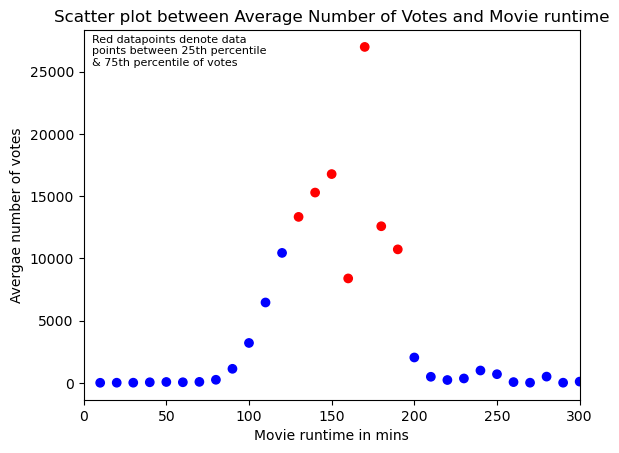

In [546]:
# Plotting the scatter plot based on the bins

x=rv.loc[:,'bins']
y=rv.loc[:,'numvotes']
colors = ['red' if 130 <= value <= 190 else 'blue' for value in x]
plt.scatter(x, y, c=colors)
plt.xlim(0, 300)
plt.title("Scatter plot between Average Number of Votes and Movie runtime")
plt.xlabel("Movie runtime in mins")
plt.ylabel("Avergae number of votes")
side_text = "Red datapoints denote data\npoints between 25th percentile \n& 75th percentile of votes"
side_x = 5 # Adjust the x-coordinate
side_y = 25500  # Adjust the y-coordinate
plt.text(side_x, side_y, side_text, fontsize=8, color='black')
plt.show()

Let's move on to the second analysis involving Studio and average rating of the movies it had created

In [547]:
# merging dataframes having Movie average rating and corresponding studio 
df5=pd.merge(df4,df1)
df5

,tconst,averagerating,numvotes,primary_title,runtime_minutes,studio,domestic_gross,foreign_gross
0,tt1043726,4.2,50352,The Legend of Hercules,99.0,LG/S,18800000.0,42400000.0
1,tt1171222,5.1,8296,Baggage Claim,96.0,FoxS,21600000.0,887000.0
2,tt1210166,7.6,326657,Moneyball,133.0,Sony,75600000.0,34600000.0
3,tt1212419,6.5,87288,Hereafter,129.0,WB,32700000.0,72500000.0
4,tt1229238,7.4,428142,Mission: Impossible - Ghost Protocol,132.0,Par.,209400000.0,485300000.0
...,...,...,...,...,...,...,...,...
1767,tt8011712,7.4,54,The Past,120.0,SPC,1300000.0,9300000.0
1768,tt2592614,5.6,74979,Resident Evil: The Final Chapter,107.0,SGem,26800000.0,285400000.0
1769,tt2704998,7.0,163279,Game Night,100.0,WB (NL),69200000.0,48500000.0
1770,tt3142688,5.8,5841,Finding Fanny,102.0,FIP,616000.0,7100000.0


In [548]:
# Sorting the dataframe by studio and finding the average rating of the movies it had created
# This is passed onto a new dataframe "rs_analysis"

rs_analysis =df5.groupby('studio',as_index=False)['averagerating'].mean().sort_values(by='averagerating', ascending=False,ignore_index=True)
rs_analysis.iloc[0:10,:] # this shows the top 10 studios based on the average rating of their movies

,studio,averagerating
0,Trafalgar,8.8
1,NAV,8.7
2,PDA,8.3
3,GrtIndia,8.3
4,VE,8.0
5,App.,7.9
6,Good Deed,7.8
7,Abr.,7.8
8,BBC,7.8
9,WOW,7.7


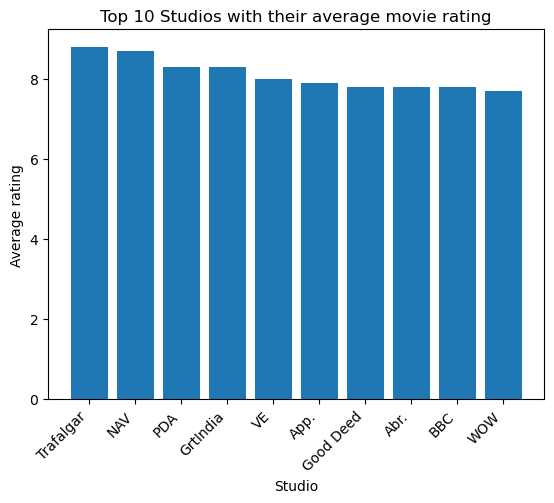

In [549]:
# Plotting the bar chart showing the top 10 studios and the average rating of their movies

plt.bar(rs_analysis.iloc[0:10,0], rs_analysis.iloc[0:10,1])
plt.xlabel('Studio')
plt.ylabel('Average rating')
plt.title('Top 10 Studios with their average movie rating')
plt.xticks(rotation=45, ha="right")
plt.show()

Therefore this shows the top 10 movie producing studios.
Now we can move onto finding the best actors based on the revenue gained by their movies

In [550]:
# Finding the crew with the category "actors" in different movies

df6=df6.loc[df6['category'] == "actor"] 
df6.head()

,tconst,nconst,category
0,tt0111414,nm0246005,actor
5,tt0323808,nm2694680,actor
6,tt0323808,nm0574615,actor
14,tt0417610,nm0532721,actor
16,tt0417610,nm0069209,actor


In [551]:
# Merging df7 and df6 to find the corresponding name of the actor 

df9=pd.merge(df7,df6)
df9

,nconst,primary_name,tconst,category
0,nm0062070,Bruce Baum,tt6463956,actor
1,nm0063198,Bayou,tt6579724,actor
2,nm0066093,Ahmad Bedair,tt1843163,actor
3,nm0066093,Ahmad Bedair,tt1805181,actor
4,nm0066093,Ahmad Bedair,tt2308899,actor
...,...,...,...,...
256556,nm9983906,Alejandro Odom,tt9010422,actor
256557,nm9985838,Anthony Simonetti,tt8028908,actor
256558,nm9989005,Jae-Hwan Kim,tt8733324,actor
256559,nm9989840,Mariya Shekaturova,tt5953804,actor


In [552]:
# Merging df9 and df5 to find the corrsponding domestic gross and foreign gross of the movie the actors acted in

df10=pd.merge(df9,df5)
df10

,nconst,primary_name,tconst,category,averagerating,numvotes,primary_title,runtime_minutes,studio,domestic_gross,foreign_gross
0,nm0093589,Matt Bomer,tt2268016,actor,5.6,48497,Magic Mike XXL,115.0,WB,66000000.0,56500000.0
1,nm0542133,Joe Manganiello,tt2268016,actor,5.6,48497,Magic Mike XXL,115.0,WB,66000000.0,56500000.0
2,nm0735226,Adam Rodriguez,tt2268016,actor,5.6,48497,Magic Mike XXL,115.0,WB,66000000.0,56500000.0
3,nm1475594,Channing Tatum,tt2268016,actor,5.6,48497,Magic Mike XXL,115.0,WB,66000000.0,56500000.0
4,nm0093589,Matt Bomer,tt3799694,actor,7.4,240337,The Nice Guys,116.0,WB,36300000.0,26500000.0
...,...,...,...,...,...,...,...,...,...,...,...
4287,nm7669524,Rómulo Ferreira,tt5132504,actor,4.8,6,Paul,71.0,Uni.,37400000.0,60600000.0
4288,nm7903162,Pierluigi Di Piazza,tt5437970,actor,6.7,25,Mama,90.0,Uni.,71600000.0,74800000.0
4289,nm7017648,Truman Hedrick,tt4597838,actor,6.7,10,Limitless,3.0,Rela.,79200000.0,82600000.0
4290,nm7564190,Kim Hedrick,tt4597838,actor,6.7,10,Limitless,3.0,Rela.,79200000.0,82600000.0


In [563]:
# Merging df10 and df8 to include worldwide gross
# saving the resulting dataframe into a new dataframe called "ar_analysis_combined"

ar_analysis_combined=pd.merge(df10,df8)
ar_analysis_combined

,nconst,primary_name,tconst,category,averagerating,numvotes,primary_title,runtime_minutes,studio,domestic_gross,foreign_gross,worldwide_gross
0,nm0093589,Matt Bomer,tt2268016,actor,5.6,48497,Magic Mike XXL,115.0,WB,66000000.0,56500000.0,123660597
1,nm0542133,Joe Manganiello,tt2268016,actor,5.6,48497,Magic Mike XXL,115.0,WB,66000000.0,56500000.0,123660597
2,nm0735226,Adam Rodriguez,tt2268016,actor,5.6,48497,Magic Mike XXL,115.0,WB,66000000.0,56500000.0,123660597
3,nm1475594,Channing Tatum,tt2268016,actor,5.6,48497,Magic Mike XXL,115.0,WB,66000000.0,56500000.0,123660597
4,nm0093589,Matt Bomer,tt3799694,actor,7.4,240337,The Nice Guys,116.0,WB,36300000.0,26500000.0,59596747
...,...,...,...,...,...,...,...,...,...,...,...,...
2921,nm8301458,Misha Nesterov,tt5897302,actor,5.9,32,Slender Man,52.0,SGem,30600000.0,21200000.0,51723644
2922,nm8301459,Leonid Zaiko,tt5897302,actor,5.9,32,Slender Man,52.0,SGem,30600000.0,21200000.0,51723644
2923,nm6018521,Colin Woodell,tt4761916,actor,5.9,13822,Unfriended: Dark Web,92.0,BH Tilt,8900000.0,6300000.0,16434588
2924,nm6907855,Noah Schnapp,tt2452042,actor,7.1,39149,The Peanuts Movie,88.0,Fox,130199999.0,116100000.0,250091610


In [564]:
# removing unwanted columns from ar_analysis_combined

ar_analysis_combined=ar_analysis_combined.drop(['numvotes','runtime_minutes','studio','averagerating', 'nconst','tconst','primary_title'],axis=1)
ar_analysis_combined

,primary_name,category,domestic_gross,foreign_gross,worldwide_gross
0,Matt Bomer,actor,66000000.0,56500000.0,123660597
1,Joe Manganiello,actor,66000000.0,56500000.0,123660597
2,Adam Rodriguez,actor,66000000.0,56500000.0,123660597
3,Channing Tatum,actor,66000000.0,56500000.0,123660597
4,Matt Bomer,actor,36300000.0,26500000.0,59596747
...,...,...,...,...,...
2921,Misha Nesterov,actor,30600000.0,21200000.0,51723644
2922,Leonid Zaiko,actor,30600000.0,21200000.0,51723644
2923,Colin Woodell,actor,8900000.0,6300000.0,16434588
2924,Noah Schnapp,actor,130199999.0,116100000.0,250091610


In [565]:
# Creating a new dataframe ar_analysis_worldwide to groupby actor name and sort by the the worldwide gross in the descending order
ar_analysis_worldwide=ar_analysis_combined.groupby('primary_name',as_index=False).agg({'worldwide_gross':'mean','domestic_gross':'mean','foreign_gross':'mean'}).sort_values(by='worldwide_gross', ascending=False,ignore_index=True)
ar_analysis_worldwide.set_index('primary_name',inplace=True)
ar_analysis_worldwide=ar_analysis_worldwide.iloc[0:10,:]
ar_analysis_worldwide

,worldwide_gross,domestic_gross,foreign_gross
primary_name,,,
Rafe Spall,1.305773e+09,417700000.0,891800000.0
Jonathan Groff,1.272470e+09,400700000.0,875700000.0
Shawn Ashmore,1.272470e+09,400700000.0,875700000.0
Ed Ackerman,1.272470e+09,400700000.0,875700000.0
Yiu-Wing Chan,1.272470e+09,400700000.0,875700000.0
Kevin Zegers,1.272470e+09,400700000.0,875700000.0
Aarif Rahman,1.272470e+09,400700000.0,875700000.0
Huck Milner,1.242521e+09,608600000.0,634200000.0
Craig T. Nelson,1.242521e+09,608600000.0,634200000.0


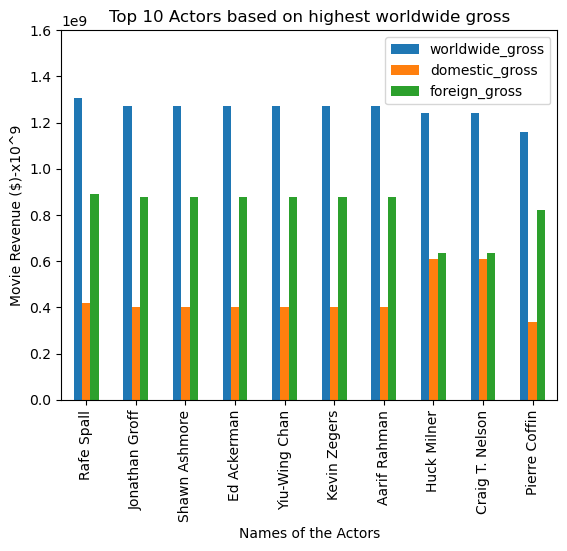

In [569]:
# Plotting the top 10 actors based on the the highest worldwide gross.
# Also shown are the corresponding domestic and foreign gross

ar_analysis_worldwide.plot(kind="bar")
plt.xlabel('Names of the Actors')
plt.ylabel('Movie Revenue ($)-x10^9')
plt.title('Top 10 Actors based on highest worldwide gross')
plt.ylim(0,1600000000)
#plt.gcf().set_size_inches(5, 2)
plt.show()

In [567]:
# Creating a new dataframe ar_analysis_domestic to groupby actor name and sort by the the domestic gross in the descending order
# This is to understand which all actors are preferred in the domestic movie industry

ar_analysis_domestic=ar_analysis_combined.groupby('primary_name',as_index=False).agg({'worldwide_gross':'mean','domestic_gross':'mean','foreign_gross':'mean'}).sort_values(by='domestic_gross', ascending=False,ignore_index=True)
ar_analysis_domestic.set_index('primary_name',inplace=True)
ar_analysis_domestic=ar_analysis_domestic.iloc[0:10,:]
ar_analysis_domestic

,worldwide_gross,domestic_gross,foreign_gross
primary_name,,,
Huck Milner,1.242521e+09,608600000.0,634200000.0
Craig T. Nelson,1.242521e+09,608600000.0,634200000.0
Alan Tudyk,1.049103e+09,532200000.0,523900000.0
Donnie Yen,1.049103e+09,532200000.0,523900000.0
Diego Luna,1.049103e+09,532200000.0,523900000.0
Albert Brooks,1.021215e+09,486300000.0,542300000.0
Ed O'Neill,1.021215e+09,486300000.0,542300000.0
Rafe Spall,1.305773e+09,417700000.0,891800000.0
Tim Allen,1.068880e+09,415000000.0,652000000.0


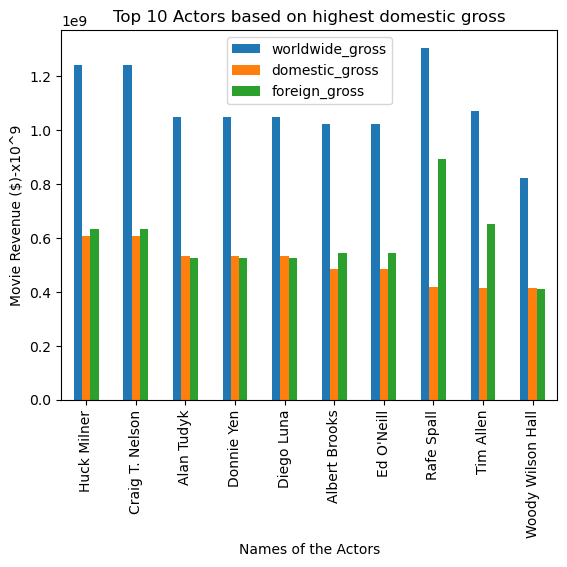

In [570]:
# Plotting the top 10 actors based on the the highest domestic gross.
# Also shown are the corresponding worldwide and foreign gross

ar_analysis_domestic.plot(kind="bar")
plt.xlabel('Names of the Actors')
plt.ylabel('Movie Revenue ($)-x10^9')
plt.title('Top 10 Actors based on highest domestic gross')
plt.show()

## Conclusion and Recommendation

The following conclusions and recommendations can be derived from the results:

+ The movies with higher number of votes had a run time between 130 minutes and 190 minutes. Microsoft would be recommended to create a movie within this timeframe in order to attain the satisfaction of the audience.

+ The top ten studios that created movies with highest ratings were found out and these included studios like Trafalgar, NAV and GrtIndia. The client could look into their production style or associate with them for their first movie.

+ The top ten actors that acted in movies that bagged high revenue from across the world was found out and these included actors like Rafe Spall, Jonathan Groff and Shawn Ashmore.

+ For good revenue collection in the domestic market, the top ten actors that could be associated with were found out and they included actors like Huck Milner, Craig T Nelson and Alan Tudyk. Microsoft may consider associating with these actors based on the market segment they are interested in.